In [ ]:
# inspired by lazyprogrammer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



import torch
import torch.nn as nn




In [ ]:
data = pd.read_csv('moore.csv', header=None).values

X = data[:,0].reshape(-1, 1)
Y = data[:,1].reshape(-1, 1)

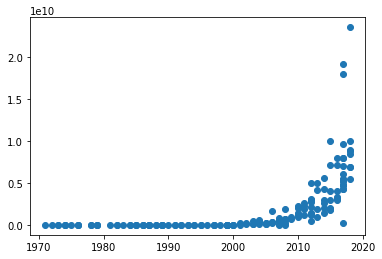

In [ ]:
plt.scatter(X, Y)

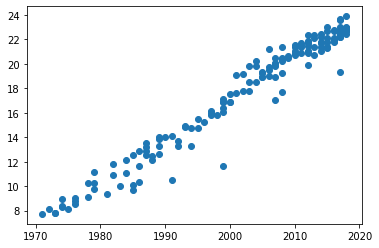

In [ ]:
# since it's a linear model, take the log
Y = np.log(Y)

plt.scatter(X, Y);

In [ ]:
# scale and center both the x and y axes

mx = X.mean()
sx = X.std()

my = Y.mean()
sy = Y.std()


X = (X - mx)/sx
Y = (Y - my)/sy

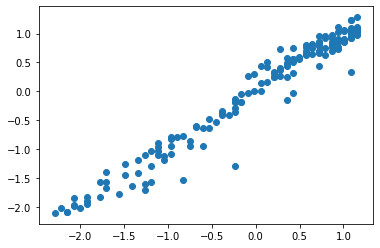

In [ ]:
plt.scatter(X, Y);

In [ ]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [ ]:
model = nn.Linear(1, 1)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [ ]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [ ]:
type(inputs)

torch.Tensor

In [ ]:
n_epochs = 100
losses = []

for it in range(n_epochs):
  optimizer.zero_grad()

  outputs = model(inputs)
  loss = criterion(outputs, targets)

  losses.append(loss.item())
    
  loss.backward()
  optimizer.step()
    
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')
  

Epoch 1/100, Loss: 0.1387
Epoch 2/100, Loss: 0.1347
Epoch 3/100, Loss: 0.1282
Epoch 4/100, Loss: 0.1204
Epoch 5/100, Loss: 0.1119
Epoch 6/100, Loss: 0.1035
Epoch 7/100, Loss: 0.0955
Epoch 8/100, Loss: 0.0880
Epoch 9/100, Loss: 0.0812
Epoch 10/100, Loss: 0.0752
Epoch 11/100, Loss: 0.0698
Epoch 12/100, Loss: 0.0652
Epoch 13/100, Loss: 0.0612
Epoch 14/100, Loss: 0.0577
Epoch 15/100, Loss: 0.0547
Epoch 16/100, Loss: 0.0522
Epoch 17/100, Loss: 0.0500
Epoch 18/100, Loss: 0.0482
Epoch 19/100, Loss: 0.0467
Epoch 20/100, Loss: 0.0454
Epoch 21/100, Loss: 0.0443
Epoch 22/100, Loss: 0.0433
Epoch 23/100, Loss: 0.0425
Epoch 24/100, Loss: 0.0419
Epoch 25/100, Loss: 0.0413
Epoch 26/100, Loss: 0.0409
Epoch 27/100, Loss: 0.0405
Epoch 28/100, Loss: 0.0402
Epoch 29/100, Loss: 0.0399
Epoch 30/100, Loss: 0.0397
Epoch 31/100, Loss: 0.0395
Epoch 32/100, Loss: 0.0393
Epoch 33/100, Loss: 0.0392
Epoch 34/100, Loss: 0.0391
Epoch 35/100, Loss: 0.0390
Epoch 36/100, Loss: 0.0389
Epoch 37/100, Loss: 0.0388
Epoch 38/1

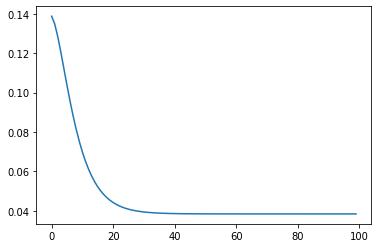

In [ ]:
plt.plot(losses);

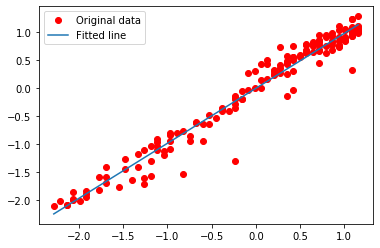

In [ ]:
predicted = model(torch.from_numpy(X)).detach().numpy()

plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
w = model.weight.data.numpy()
print(w)

[[0.98055273]]


In [ ]:
a = w[0,0] * sy / sx
print(a)

0.3416760792975696


In [ ]:
print("Time to double:", np.log(2) / a)

Time to double: 2.028667567202665
